AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
import pandas as pd

# 1. Import the Titanic dataset using pandas
# For this example, we'll assume the dataset is in CSV format and called 'titanic.csv'
df = pd.read_csv('titanic.csv')

# 2. Create a DataFrame from the dataset - already done in step 1 with df creation

# 3. Print the first 10 rows of the dataset
print(df.head(10))

# 4. Print the last 20 rows of the dataset
print(df.tail(20))

# 5. Print dataset's information
print(df.info())

# 6. Describe the dataset
print(df.describe())

# 7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines
# This is typically handled by the notebook or script environment where you control the output display

   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:36: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Xiaos\AppData\Local\Temp\ipykernel_15320\3426001169.py:36: SyntaxWarning: invalid escape sequence '\$'
  df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True).astype(float)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


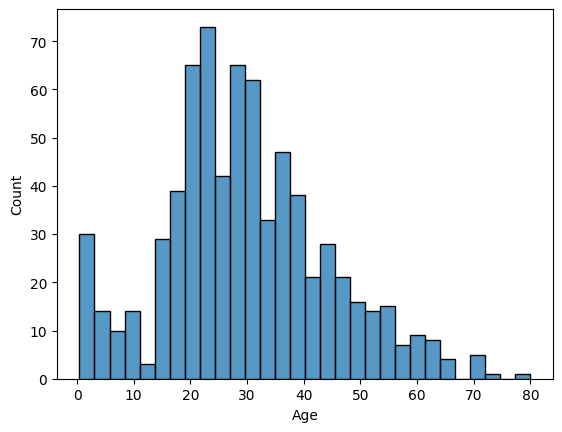

Mean Age: 29.69911764705882, Median Age: 28.0


C:\Users\Xiaos\AppData\Local\Temp\ipykernel_15320\3426001169.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=median_age, inplace=True)
C:\Users\Xiaos\AppData\Local\Temp\ipykernel_15320\3426001169.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

ValueError: invalid literal for int() with base 10: 'Zero'

In [2]:
# 1. Find out how many missing values there are in the dataset
print(df.isnull().sum())

# 2. For the 'Age' column, find the best way to handle the missing values
import seaborn as sns
import matplotlib.pyplot as plt

# 2.1. Use an appropriate plot to study the nature of the 'Age' column
sns.histplot(df['Age'].dropna(), bins=30, kde=False)
plt.show()

# 2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
mean_age = df['Age'].mean()
median_age = df['Age'].median()
print(f'Mean Age: {mean_age}, Median Age: {median_age}')

# 2.3. Using the most suitable central tendency measure, fill the missing values in the age column
df['Age'].fillna(value=median_age, inplace=True)

# 3. Decide what is the best way to handle the missing values in the 'Cabin' columns
# Since 'Cabin' data is highly incomplete, it might be dropped or encoded based on the pattern
# For this example, we'll drop it
df.drop('Cabin', axis=1, inplace=True)

# 4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
# Most common is 'S', so we can fill missing values with 'S'
df['Embarked'].fillna(value='S', inplace=True)

# 5. Handle the incorrect data under the 'Survived' columns using appropriate measure
# 'Survived' should only contain 0 and 1, any other value is incorrect
df['Survived'] = df['Survived'].astype(int)

# 6. Handle the incorrectly formatted data under the 'Fare' column
# Replace incorrect fare values (e.g., $27.7208) with the median fare
median_fare = df['Fare'].median()
df['Fare'] = df['Fare'].replace('[\$,]', '', regex=True).astype(float)
df['Fare'].fillna(value=median_fare, inplace=True)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


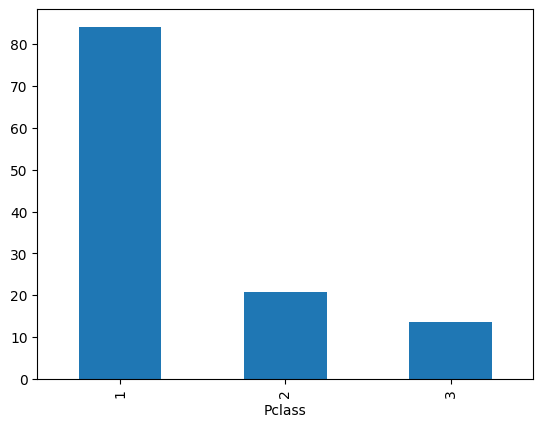

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


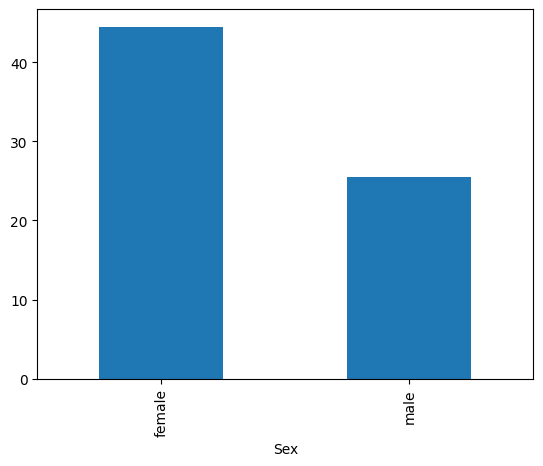

In [7]:
# 1. 按'Pclass'分组计算平均票价
avg_fare_pclass = titanic_df.groupby('Pclass')['Fare'].mean()
print(avg_fare_pclass)

# 1.1. 绘制图形
avg_fare_pclass.plot(kind='bar')
plt.show()

# 2. 按'Sex'分组计算平均票价
avg_fare_sex = titanic_df.groupby('Sex')['Fare'].mean()
print(avg_fare_sex)

# 2.1. 绘制图形
avg_fare_sex.plot(kind='bar')
plt.show()

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


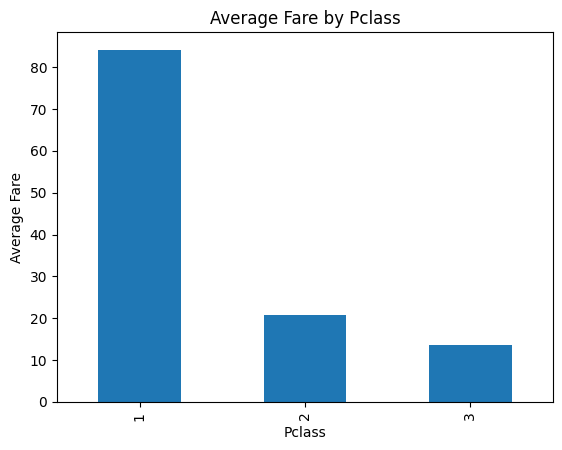

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


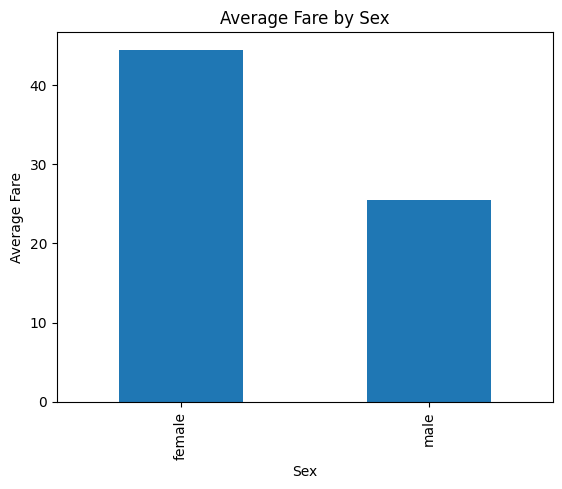

In [8]:
# 1. 按'Pclass'分组计算平均票价
avg_fare_pclass = titanic_df.groupby('Pclass')['Fare'].mean()
print(avg_fare_pclass)

# 1.1. 绘制图形
avg_fare_pclass.plot(kind='bar')
plt.show()

# 2. 按'Sex'分组计算平均票价
avg_fare_sex = titanic_df.groupby('Sex')['Fare'].mean()
print(avg_fare_sex)

# 2.1. 绘制图形
avg_fare_sex.plot(kind='bar')
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

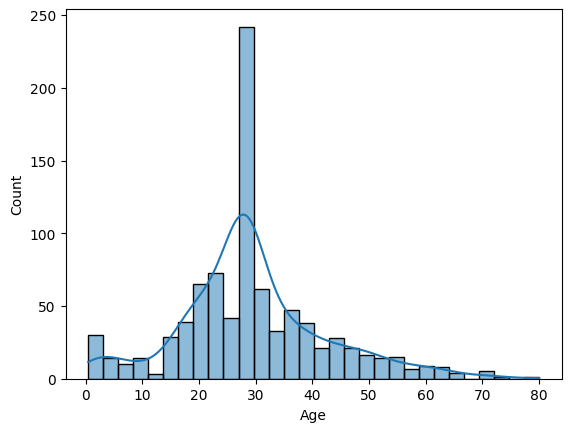

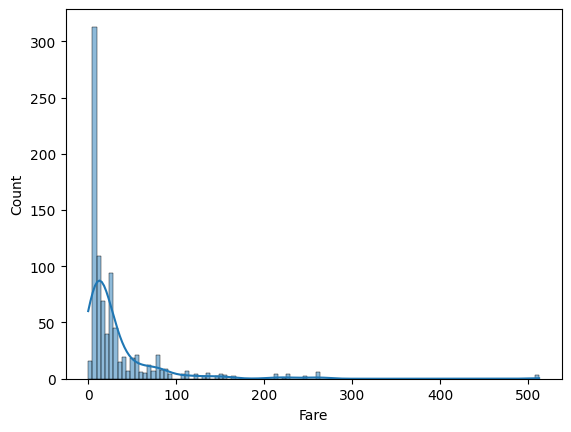

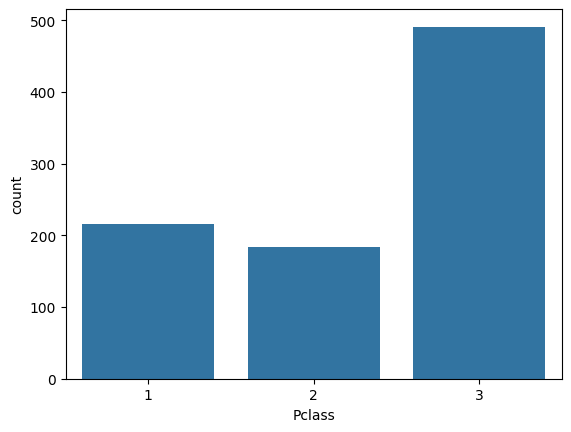

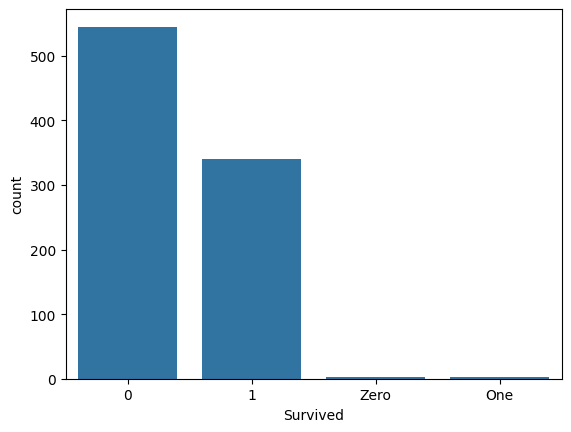

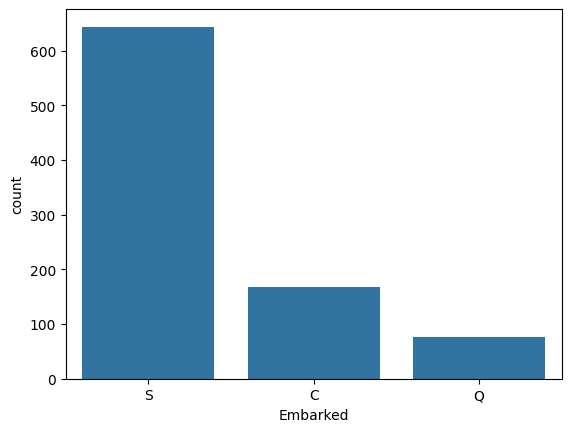

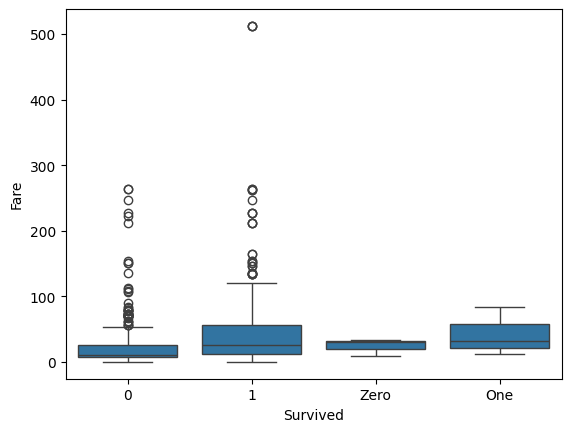

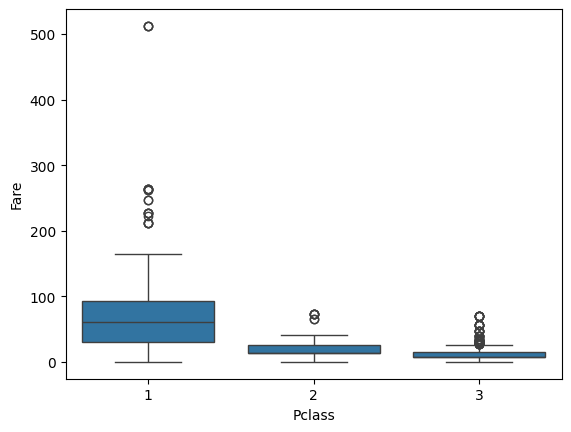

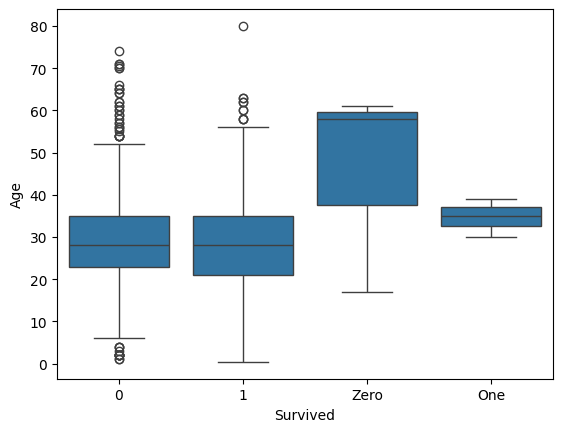

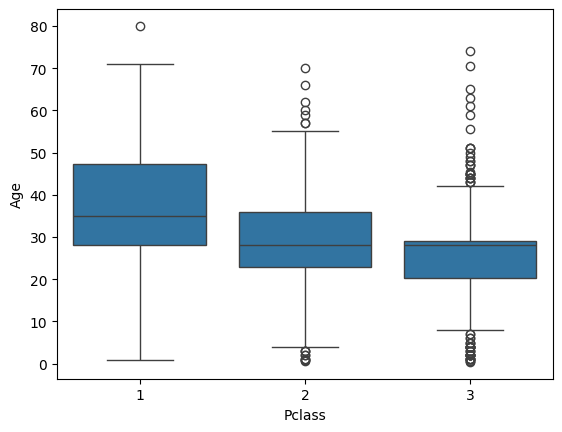

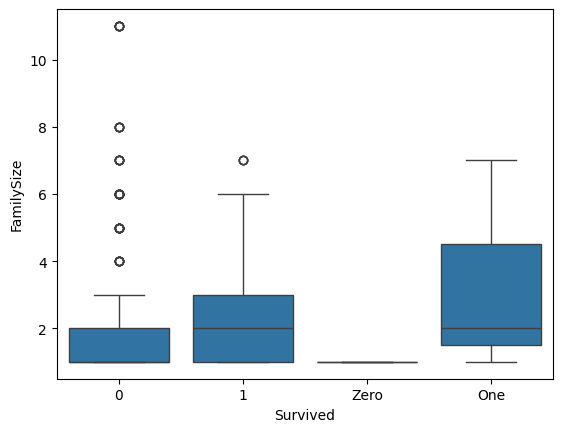

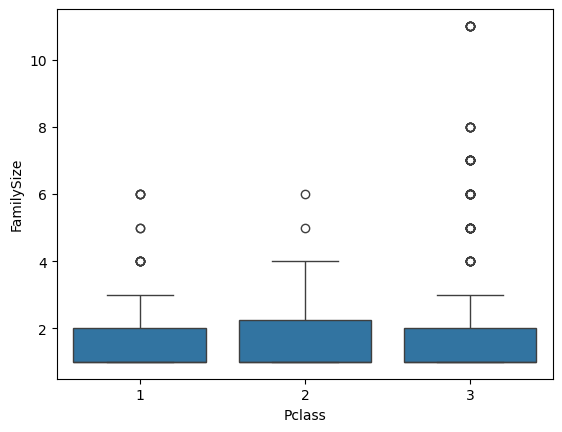

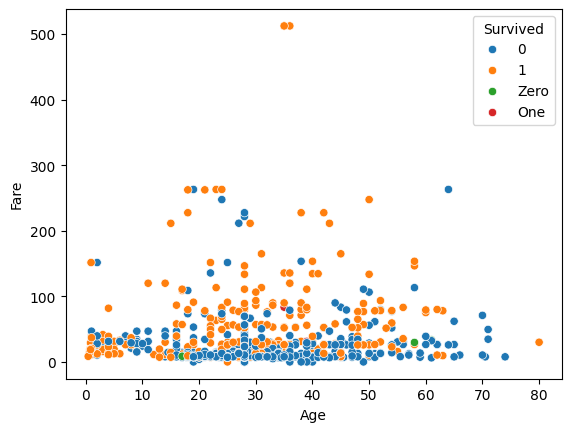

In [10]:
# 1-13. Dataset visualization using pandas
sns.histplot(titanic_df['Age'], kde=True)
plt.show()

sns.histplot(titanic_df['Fare'], kde=True)
plt.show()

sns.countplot(x='Pclass', data=titanic_df)
plt.show()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Embarked', data=titanic_df)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.show()

sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

# 10. 'SibSp'and'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
sns.boxplot(x='Survived', y='FamilySize', data=titanic_df)
plt.show()

sns.boxplot(x='Pclass', y='FamilySize', data=titanic_df)
plt.show()

# 12. 'Age'and'Fare'
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [11]:
# 1. two dataset's matrix
corr_matrix = titanic_df.corr()
print(corr_matrix)

# 2. 'Age'and'Fare'
age_fare_corr = corr_matrix['Fare']['Age']
print(f"The correlation between Age and Fare is: {age_fare_corr}")



ValueError: could not convert string to float: 'Zero'